## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [34]:
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

# First checking if the distribution is normal.

{'boxes': [<matplotlib.lines.Line2D at 0x10c5f5c90>],
 'caps': [<matplotlib.lines.Line2D at 0x10c95ead0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b644b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1092cb790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10c315e90>,
  <matplotlib.lines.Line2D at 0x10c5bf290>]}

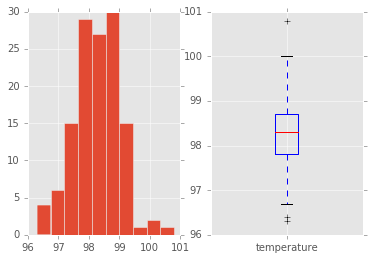

In [117]:
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pl.subplot(1,2,1)
df['temperature'].hist()
pl.subplot(1,2,2)
df.boxplot(column = 'temperature', return_type = 'dict')

The distribution of the sample provided seems to be nearly normal. But we might need to look deeper into it. Looking into the theoretical quantiles might help.

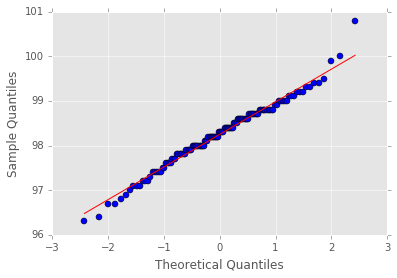

In [133]:
sm.qqplot(df.temperature, line='s')
plt.grid(True)

The quantiles generally follow a straight line, thus we can assume that the distribution is nearly normal. 

Further we can check the 68-95-99.7 rule of a normal distribution, if it applies here.

In [43]:
#define the max
max_temp = df.temperature.max()
min_temp = df.temperature.min()
print "Maximum temperature is %f" % max_temp
print "Minimum temperature is %f" % min_temp

Maximum temperature is 100.800000
Minimum temperature is 96.300000


In [44]:
(df.temperature.mean() - 3*df.temperature.std(), df.temperature.mean() + 3*df.temperature.std())

(96.04968129511394, 100.44878024334761)

The minimum is within 3 standard deviations from the mean, but the maximum exceeds 3 standard deviations. Given that the difference is still very small, and the rule would only look at 99.7% of the data points, there is still ***strong evidence of looking at a normal distribution.***

In [131]:
def normality_plots(df):
    pl.subplot(1,2,1)
    df.temperature.hist()
    pl.subplot(1,2,2)
    df.boxplot(column = 'temperature', return_type = 'dict')
    sm.qqplot(df.temperature, line='s')
    plt.grid(True)
    
def normal_rule(df):
    #define the max
    max_temp = df.temperature.max()
    min_temp = df.temperature.min()
    interval = (df.temperature.mean() - 3*df.temperature.std(), df.temperature.mean() + 3*df.temperature.std())
    if interval[0] < min_temp and interval[1] > max_temp:
        return "Definitely a normal distribution"
    else:
        return "The lower value of the interval is {0} and the min temperature is {1}, \
        while the upper value of the interval is {2} and the max temperature is {3}".format(interval[0], min_temp, interval[1],max_temp)

# Setting the hypothesis.


1. H0: mean of the population = 98.6∘F 
2. HA: mean of the population != 98.6∘F 

### Calculating the point estimate

In [53]:
point_estimate = df.temperature.mean()
pd.DataFrame(df.temperature.describe())

,temperature
count,130.000000
mean,98.249231
std,0.733183
min,96.300000
25%,97.800000
50%,98.300000
75%,98.700000
max,100.800000


### Checking for conditions:

1. **Independence**: This seems guaranteed since we have 130 people in the sample dataset, and there is a very small chance that they are related in any way.
2. **Sample size/skew**: We noticed that the sample looks nearly normal but still looks right-tailed skewed. And 130 is less than 10% of the entire population of the world.

Further on, we need to be careful that the sample size is > 30 people, which it is.

### Calculating test statistic

In [60]:
#calculating the standard error
standard_error = df.temperature.std()/(len(df) **0.5)

#calculating the test statistic
z = (point_estimate - 98.6) / standard_error
z

-5.454823292364079

In [61]:
# #calculate probability that the mean > -0.41, given that the mean of the population is
# from scipy.stats import norm as nr
# p_values = nr.cdf(abs(z))*2 # this doesn't seem to return what I'd expect.
# p_values

1.9999999509784299

In [47]:
#calculate probability that the mean > -5.45, given that the mean of the population is, by checking the z-score table. 
p_value = 0

In [137]:
#using in place methods to confirm our results
from scipy import stats
print 't-statistic = %f, pvalue = %f' %  stats.ttest_1samp(df.temperature, 98.6)
print 'z-statistic = %f pvalue = %f' %  sm.stats.ztest(df.temperature, value=98.6)

t-statistic = -5.454823, pvalue = 0.000000
z-statistic = -5.454823 pvalue = 0.000000


Normally, if we don't know the standard deviation of the population, we should consider using the t-score, but given that the sample size is larger than 30, we could go ahead and consider the standard deviation of the sample. This is why both t-test and z-test provided very similar results.

### Conclusion

Since we have an unusually big z-score, we know that the p-value will be very close to 0.

Thus we can conclude that we have strong evidence that the mean body temperature is not 98.6, thus we **reject the null hypothesis.**

# At what temperature should we consider someone's temperature to be "abnormal"?

**Margin of error:**

In [89]:
#z-scores for appropriate levels
a1 = 0.68
a2 = 0.95
a3 = 0.997

z1 = stats.norm.ppf(1 - ((1-a1)/2))
z2 = stats.norm.ppf(1 - ((1-a2)/2))
z3 = stats.norm.ppf(1 - ((1-a3)/2))

vals = {a1:z1, a2:z2,a3:z3}
# ME= z*standard_error of the sampling distribution

ME = {level:z_score*standard_error for level, z_score in vals.iteritems()}
ME[0.95]


0.1260343410491174

Confidence intervals can be detirmened as so:

In [92]:
CI = {level:(point_estimate - me_level, point_estimate + me_level) for level, me_level in ME.iteritems()}
for level, ci in CI.iteritems():
    print "CI for {0} is {1}".format(level*100, ci)

CI for 68.0 is (98.185282734981129, 98.313178803480426)
CI for 95.0 is (98.123196428181657, 98.375265110279898)
CI for 99.7 is (98.058392112613987, 98.440069425847568)


An approximate **95% Confidence Interval is**:

In [93]:
CI[0.95]

(98.123196428181657, 98.375265110279898)

This means that 95% of random samples of 130 body temperatures will yield confidence intervals that capture the true population mean of body temperatures.

Temperatures above **98.44 degrees Fahrenheit will be considered abnormal or extreme.**

# Is there a significant difference between males and females in normal temperature?

In [104]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

males.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [105]:
females.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


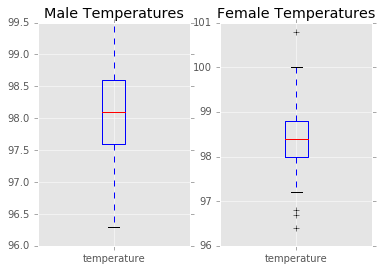

In [118]:
#visual inspection
pl.subplot(1,2,1)
males.boxplot(column = 'temperature', return_type = 'dict')
pl.title("Male Temperatures")
pl.subplot(1,2,2)
females.boxplot(column = 'temperature',return_type='dict')
pl.title("Female Temperatures")

Looking at the summary statistics and visual interpretations, it does seem that the women average body temperature might be higher than the male one. To verify, we will need to start a 2-tailed hypothesis test.

The steps we need to take are:
* Set the hypothesis
* Calculate point estimate for both samples
* Verify conditions for CLT
* Calculate test statistic
* Make a decision

### Setting the hypothesis

H0: miu_female - miu_male = 0

HA: miu_female - miu_male != 0

### Calculating point estimate for samples

In [119]:
point_estimate_female = females.temperature.mean()
point_estimate_male = males.temperature.mean()

point_estimate_diff = point_estimate_female - point_estimate_male
point_estimate_diff

0.289230769230727

### Checking conditions

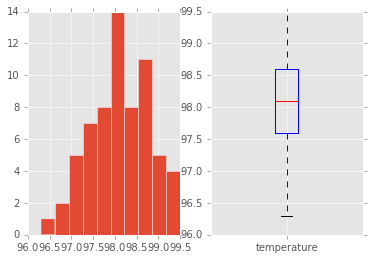

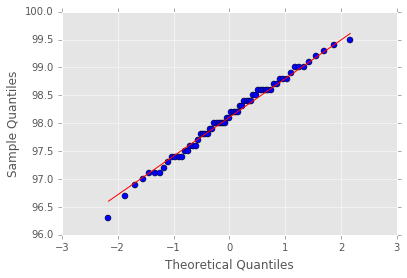

In [127]:
normality_plots(males)

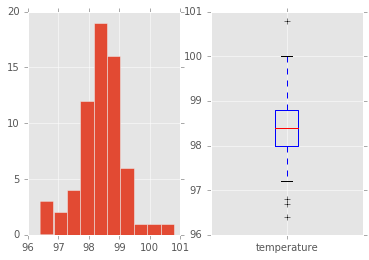

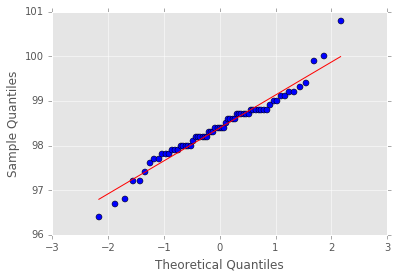

In [128]:
normality_plots(females)

In [134]:
print "For males: " + normal_rule(males)
print "\n"
print "For females: " + normal_rule(females)

For males: Definitely a normal distribution


For females: The lower value of the interval is 96.1633828957 and the min temperature is 96.4,         while the upper value of the interval is 100.624309412 and the max temperature is 100.8


We may have a bit of confusion on the females part, given that their maximum temperature exceeds what the 3 standard deviations. 

But given that the difference is still small, we will go ahead and assume it is a normal distribution

1. **Independece**: we will consider that it is very likely that the data is independent, since it is large enough that the people should not have any genetic relations between them.
2. **Sample size/skew**: the sample size for both sets is 65, which exceeds the minimum rule of thumb 30, and is less than 10% of the population

### Calculating test statistic

Since we are perfoming a two-sided test for the null hypothesis, where the population mean is unknown, we will continue with a t-test: 

In [141]:
print 't-statistic = %f pvalue = %f' %  stats.ttest_ind(males.temperature, females.temperature)

t-statistic = -2.285435 pvalue = 0.023932


There is a 2.39% chance that there will be a 0.28 degrees Fahrenheit difference between males and females. 

But given that the value is still small, we *do* have enough evidence to reject the null hypothesis 
and accept that there is a difference between men and women body temperatures